In [1]:
!pip install ColabTurtlePlus

import random
import math
from ColabTurtlePlus.Turtle import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Put clearscreen() as the first line in a cell (after the import command) to re-run turtle commands in the cell


In [2]:
# dla pseudo ekranu -> initializeTurtle((800,600), 'standard')
def putpixel(x, y, pen_color='black'):
  color(pen_color)
  up()
  x = (x * 10) - 400 + 5
  y = (y * 10) - 300 + 5  
  goto(x, y)
  down()
  dot(10, pen_color)

In [3]:
# dla pseudo ekranu -> initializeTurtle((800,600), 'standard')
def grid(size=10):
  pencolor(220, 220, 220)
  color(220, 220, 220)
  for x in range(-400, 401, size):
    line(x, -300, x, 300)
  for y in range(-300, 301, size):
    line(-400, y, 400, y)
    
  

In [4]:
def bresenham(x1, y1, x2, y2):
  dy = y2 - y1
  dp = 2 * dy
  dx = x2 - x1
  d = dp - dx

  y = y1
  for x in range(x1, x2+1):
    putpixel(x, y, 'red')
    while (d >= 0):
      y = y + 1
      d = d - 2*dx
    else :
      d = d + dp

In [ ]:
# inicjalizacja ekranu
initializeTurtle((800,600), 'standard')
#clearscreen()                                # to jest potrzebne dla Jupyter Notebook
speed(100)
hideturtle()
bgcolor('white')
grid()
print(f"({int(window_width()/10)}, {int(window_height()/10)})")
bresenham(10, 10, 70, 50)

(80, 60)


#Rasteryzacja odcinka

Załóżmy na początek, że odcinek ma nachylanie z przedziału 0-45 stopni, oraz że jeden z jego końców znajduje się w początku układu współrzędnych, natomiast drugi ma współrzędne (dx, dy). Równanie opisujące prostą ma postać

f(x, y) = ax + by + c

gdzie [a, b] jest wektorem normalnym; możemy go otrzymać poprzez obrót wektora [dx, dy] o 90 stopni, więc a = dy, b = − dx. Czynnik wolny c jest równy 0, ponieważ f(0, 0) = c i f(0, 0) = 0.

Wartości funkcji są dodatnie dla punktów znajdujących się poniżej odcinka.

Jak widać poniżej, różnice pierwszego rzędu zależą wyłącznie od współrzędnych końców odcinka.

deltaA = dy(x + 2) − dx(y + 0.5) − dy(x + 1) + dx(y + 0.5) = dy,
deltaB = dy(x + 2) − dx(y + 1.5) − dy(x + 1) + dx(y + 0.5) = dy − dx.
Wartość początkowa d jest równa (0 + 1, 0 + 0.5) = dy − 0.5 ⋅ dx. Pojawiła się niestety wartość ułamkowa, ale ponieważ interesuje nas wyłącznie znak funkcji (znak zmiennej decyzyjnej) nic nie stoi na przeszkodzie by pomnożyć ją przez 2. Zwracam uwagę, że to pociągnie za sobą przemnożenie przyrostów, co zostało uwzględnione w poniższej funkcji.

In [ ]:
def simple_line(dx, dy, pcolor='red'):
  d       = 2*dy - dx
  delta_A = 2*dy
  delta_B = 2*dy - 2*dx

  y = 0
  for  x in range(dx):
    putpixel(x, y, pcolor)
    if d > 0:
      d += delta_B
      y += 1
    else:
       d += delta_A

In [ ]:
# inicjalizacja ekranu
initializeTurtle((800,600), 'standard')
#clearscreen()                                # to jest potrzebne dla Jupyter Notebook
speed(100)
hideturtle()
bgcolor('white')
grid()
print(f"({int(window_width()/10)}, {int(window_height()/10)})")
simple_line(50, 50)

(80, 60)


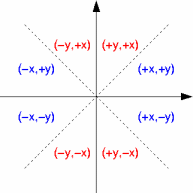

Narysowanie odcinka o innych nachyleniach wymaga zamiany współrzędnych zgodnie z rysunkiem powyżej. Nie jest to zbyt kłopotliwe — na rysunku kolorem niebieskim zaznaczono te oktanty w których moduł nachylenia odcinka jest z przedziału 0-45 stopni. Do rasteryzacji tych odcinków można z powodzeniem użyć funkcji simple_line, należy jedynie operować na modułach dx i dy i uzależnić przyrosty x i y od znaku, odpowiednio dx i dy. Natomiast W przypadku oktantów oznaczonych czerwonych należy wymienić x z y — podkreślam, że robi się to przed obliczeniem dx, dy.

Uwzględnienie dowolnych odcinków jest bardzo proste, wystarczy stawiać piksele o odpowiednio przesuniętych współrzędnych. Wszystko to zostało zebrane w kodzie poniżej.

In [ ]:
def line_b(x0, y0, x1, y1, pcolor='red'):
  dx = x1 - x0
  dy = y1 - y0

  def sign(x):
    if x >= 0: 
      return +1
    else:      
      return -1

  inc_x = sign(dx)  # uwzględnienie znaków dx
  inc_y = sign(dy)  # i dy

  dx = abs(dx)      # teraz odcinek został "przeniesiony"
  dy = abs(dy)      # do właściwego oktantu

  if dx >= dy:      # dy/dx <= 1 -- odcinek leży w "niebieskim" oktancie
    d       = 2 * dy - dx
    delta_A = 2 * dy
    delta_B = 2 * dy - 2 * dx

    x, y = (0, 0)
    for i in range(dx + 1):
      putpixel(x0 + x, y0 + y, pcolor)
      if d > 0:
        d += delta_B
        x += inc_x
        y += inc_y
      else:
        d += delta_A
        x += inc_x
  else:            # dy/dx > 1 -- odcinek leży w "czerwonym" oktancie
                   # proszę zwrócić uwagę na wspomnianą zamianę znaczenia
                   # zmiennych

    d       = 2*dx - dy
    delta_A = 2*dx
    delta_B = 2*dx - 2*dy

    x, y = (0, 0)
    for i in range(dy+1):
      putpixel(x0 + x, y0 + y, pcolor)
      if d > 0:
        d += delta_B
        x += inc_x
        y += inc_y
      else:
        d += delta_A
        y += inc_y

In [ ]:
# inicjalizacja ekranu
initializeTurtle((800,600), 'standard')
#clearscreen()                                # to jest potrzebne dla Jupyter Notebook
speed(100)
hideturtle()
bgcolor('white')
grid()
print(f"({int(window_width()/10)}, {int(window_height()/10)})")
line_b(10, 50, 50, 10)

(80, 60)


Dwukrotne przyspieszenie można uzyskać rozpoczynając rasteryzację równocześnie z dwóch końców odcinka — moduły przyrostów nie zależą od kolejności w jakiej poda się punkty końcowe odcinka. Należy jedynie uzupełnić jeden piksel na środku odcinka.

In [ ]:
def simple_line_faster(x0, y0, x1, y1, pcolor='red'):
  dx, dy  = x1-x0, y1-y0

  d       = 2*dy - dx
  delta_A = 2*dy
  delta_B = 2*dy - 2*dx

  y = 0
  dx2 = (dx + 1) // 2 
  for x in range(dx2):
    putpixel(x0 + x, y0 + y, pcolor)
    putpixel(x1 - x, y1 - y, pcolor)

    if d > 0:
      d += delta_B
      y += 1
    else:
      d += delta_A

  if dx % 2 == 0:
    putpixel(x0 + dx2, y0 + y, pcolor)

In [ ]:
# inicjalizacja ekranu
initializeTurtle((800,600), 'standard')
#clearscreen()                                # to jest potrzebne dla Jupyter Notebook
speed(10)
hideturtle()
bgcolor('white')
grid()
print(f"({int(window_width()/10)}, {int(window_height()/10)})")
simple_line_faster(10, 10, 70, 50)

(80, 60)


# RASTERYZACJA OKRĘGU
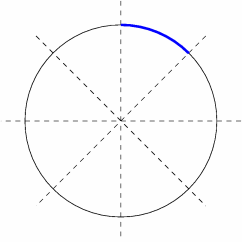

Podczas rasteryzacji okręgu wykorzystana zostanie jego ośmiokrotna symetria; rasteryzacji zostanie poddany zaznaczony na niebiesko oktant (który spełnia warunki nakładane przez algorytm Bresenhama), piksele z pozostałych oktantów uzyskane zostaną przez odbicia symetryczne

In [5]:
def circle(x0, y0, r, pcolor='red'):

  def circle_points(x,y): # funkcja odbija symetrycznie punkt
    putpixel(x0-x, y0-y, pcolor)
    putpixel(x0-x, y0+y, pcolor)
    putpixel(x0+x, y0-y, pcolor)
    putpixel(x0+x, y0+y, pcolor)
    putpixel(x0-y, y0-x, pcolor)
    putpixel(x0-y, y0+x, pcolor)
    putpixel(x0+y, y0-x, pcolor)
    putpixel(x0+y, y0+x, pcolor)

  d = 5.0-4*r
  x = 0
  y = r

  deltaA = (-2*r+5)*4
  deltaB = 3*4
  while (x <= y):
    circle_points(int(x), int(y))
    if d > 0:
      d += deltaA
      y -= 1
      x += 1
      deltaA += 4 * 4
      deltaB += 2 * 4

    else:
      d += deltaB
      x += 1
      deltaA += 2 * 4
      deltaB += 2 * 4

In [6]:
# inicjalizacja ekranu
initializeTurtle((800,600), 'standard')
clearscreen()
speed(100)
hideturtle()
bgcolor('white')
grid()
print(f"({int(window_width()/10)}, {int(window_height()/10)})")
circle(40, 30, 20)

(80, 60)


# RASTERYZACJA ELIPSY
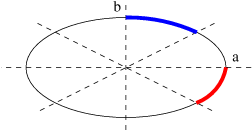

Podczas rasteryzacji elipsy wykorzystamy jej czterokrotną symetrię, jednakże przetwarzane będą dwie części elipsy, zaznaczone na niebiesko i czerwono. Zostanie pokazana procedura rasteryzująca część elipsy zaznaczoną na niebiesko; aby przetworzyć część czerwoną wystarczy wymienić a z b (półosie elipsy) i ponownie wywołać procedurę.

In [7]:
def rasterize(x0,y0, a,b, ellipse_points):
  a2 = a*a
  b2 = b*b

  d       = 4*b2 - 4*b*a2 + a2
  delta_A = 4*3*b2
  delta_B = 4*(3*b2 - 2*b*a2 + 2*a2)

  limit   = (a2*a2)/(a2+b2)

  x, y    = (0, b)
  while True:
    # funkcja rysuje symetrycznie odbite punkty
    # (albo dla "czerwonej" albo dla "niebieskiej" części)
    ellipse_points(x0, y0, x, y)

    if x*x >= limit:
      break

    if d > 0:
       d       += delta_B
       delta_A += 4*2*b2
       delta_B += 4*(2*b2 + 2*a2)

       x += 1
       y -= 1
    else:
       d       += delta_A
       delta_A += 4*2*b2
       delta_B += 4*2*b2

       x += 1

def ellipse(x0, y0, a, b):
  def ellipse_points_blue(x0, y0, x, y):
    putpixel(x0+x, y0+y, 'blue')
    putpixel(x0-x, y0+y, 'blue')
    putpixel(x0+x, y0-y, 'blue')
    putpixel(x0-x, y0-y, 'blue')

  def ellipse_points_red(x0,y0, x,y):
    putpixel(x0+y, y0+x, 'red')
    putpixel(x0-y, y0+x, 'red')
    putpixel(x0+y, y0-x, 'red')
    putpixel(x0-y, y0-x, 'red')

  def circle_points(x0, y0, x, y):
    ellipse_points_blue(x0, y0, x, y)
    ellipse_points_red (x0, y0, x, y)

  if (a == b):
    rasterize(x0,y0, a,a, circle_points)
  else:
    rasterize(x0,y0, a,b, ellipse_points_blue)
    rasterize(x0,y0, b,a, ellipse_points_red)

In [8]:
# inicjalizacja ekranu
initializeTurtle((800,600), 'standard')
#clearscreen()
speed(100)
hideturtle()
bgcolor('white')
grid()
print(f"({int(window_width()/10)}, {int(window_height()/10)})")
ellipse(40, 30, 20, 10)

(80, 60)
